In [1]:
import amp.data_utils.data_loader as data_loader
import amp.models.discriminators.amp_classifier_noCONV as noconv_classifier
import amp.utils.classifier_utils as cu
import numpy as np
import tensorflow as tf
from amp.config import MAX_LENGTH, MIN_LENGTH, VOCAB_PAD_SIZE
from amp.utils.seed import set_seed
from sklearn import metrics, model_selection

set_seed(36)


Using TensorFlow backend.


In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [3]:
data_manager = data_loader.AMPDataManager(
    '../data/unlabelled_positive.csv',
    '../data/unlabelled_negative.csv',
    min_len=MIN_LENGTH,
    max_len=MAX_LENGTH)

x, y = data_manager.get_merged_data()

/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


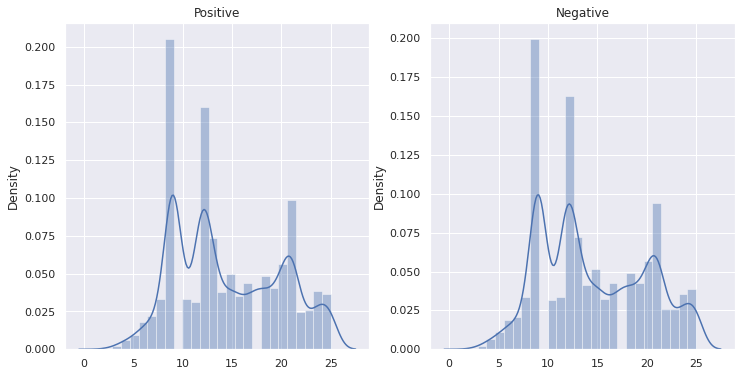

In [4]:
data_manager.plot_distributions(equalize=True)

In [5]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1, random_state=36)

In [6]:
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=36)

In [7]:
oof_preds = np.zeros((len(x_train), 1))
test_preds = []
for split_index, (train, val) in enumerate(cv.split(x_train, y_train)):
    print('Fold %s' % split_index)
    logger = cu.ClassifierLogger(
        out_fn=f'{split_index}.h5',
        patience=10,
        out_path='amp_classifier_training/',
    )
    amp_classifier_model = noconv_classifier.NoConvAMPClassifierFactory.get_default(max_length=MAX_LENGTH)
    amp_classifier_model = amp_classifier_model ()
    amp_classifier_model.fit(
        x_train[train], y_train[train],
        epochs=100,
        batch_size=128,
        validation_data = (x_train[val], y_train[val]),
        verbose=1,
        callbacks=[logger]
)
    amp_classifier_model.load_weights(f'amp_classifier_training/{split_index}.h5')
    test_pred = amp_classifier_model.predict(x_test, batch_size=64)
    test_preds.append(test_pred)
    oof_preds[val] = amp_classifier_model.predict(x_train[val])

Fold 0


/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 18031 samples, validate on 2004 samples
Epoch 1/100
18031/18031 [==============================] - 5s 297us/step - loss: 0.4694 - accuracy: 0.7878 - val_loss: 0.4349 - val_accuracy: 0.8034
Epoch 0 - best F1: 0.7796, AUC 0.8573
Epoch 2/100
18031/18031 [==============================] - 2s 128us/step - loss: 0.4194 - accuracy: 0.8146 - val_loss: 0.4412 - val_accuracy: 0.8034
Epoch 1 - current F1: 0.7743, AUC: 0.8623
Epoch 3/100
18031/18031 [==============================] - 2s 137us/step - loss: 0.4146 - accuracy: 0.8195 - val_loss: 0.4307 - val_accuracy: 0.8049
Epoch 2 - best F1: 0.7928, AUC 0.8694
Epoch 4/100
18031/18031 [==============================] - 3s 139us/step - loss: 0.4016 - accuracy: 0.8230 - val_loss: 0.4161 - val_accuracy: 0.8189
Epoch 3 - best F1: 0.7948, AUC 0.8814
Epoch 5/100
18031/18031 [==============================] - 2s 134us/step - loss: 0.3914 - accuracy: 0.8274 - val_loss: 0.3992 - val_accuracy: 0.8234
Epoch 4 - best F1: 0.8038, AUC 0.889
Epoch 6/100
1

/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 18031 samples, validate on 2004 samples
Epoch 1/100
18031/18031 [==============================] - 5s 270us/step - loss: 0.4719 - accuracy: 0.7821 - val_loss: 0.4279 - val_accuracy: 0.8094
Epoch 0 - best F1: 0.7957, AUC 0.8665
Epoch 2/100
18031/18031 [==============================] - 2s 128us/step - loss: 0.4212 - accuracy: 0.8150 - val_loss: 0.4220 - val_accuracy: 0.8129
Epoch 1 - current F1: 0.7863, AUC: 0.8726
Epoch 3/100
18031/18031 [==============================] - 2s 128us/step - loss: 0.4168 - accuracy: 0.8163 - val_loss: 0.4106 - val_accuracy: 0.8154
Epoch 2 - current F1: 0.7931, AUC: 0.8771
Epoch 4/100
18031/18031 [==============================] - 2s 120us/step - loss: 0.4080 - accuracy: 0.8173 - val_loss: 0.3945 - val_accuracy: 0.8194
Epoch 3 - best F1: 0.8007, AUC 0.8858
Epoch 5/100
18031/18031 [==============================] - 2s 125us/step - loss: 0.3960 - accuracy: 0.8255 - val_loss: 0.3855 - val_accuracy: 0.8283
Epoch 4 - best F1: 0.8052, AUC 0.8903
Epoch 6/

Epoch 42 - current F1: 0.8573, AUC: 0.9218
Epoch 44/100
18031/18031 [==============================] - 2s 124us/step - loss: 0.1398 - accuracy: 0.9438 - val_loss: 0.4498 - val_accuracy: 0.8533
Epoch 43 - current F1: 0.8518, AUC: 0.9225
Epoch 45/100
18031/18031 [==============================] - 2s 129us/step - loss: 0.1351 - accuracy: 0.9459 - val_loss: 0.4621 - val_accuracy: 0.8588
Epoch 44 - current F1: 0.8566, AUC: 0.9204
Fold 2


/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 18031 samples, validate on 2004 samples
Epoch 1/100
18031/18031 [==============================] - 4s 249us/step - loss: 0.4696 - accuracy: 0.7797 - val_loss: 0.4252 - val_accuracy: 0.8114
Epoch 0 - best F1: 0.7891, AUC 0.8648
Epoch 2/100
18031/18031 [==============================] - 2s 123us/step - loss: 0.4220 - accuracy: 0.8134 - val_loss: 0.4181 - val_accuracy: 0.8134
Epoch 1 - best F1: 0.7938, AUC 0.8683
Epoch 3/100
18031/18031 [==============================] - 2s 132us/step - loss: 0.4140 - accuracy: 0.8179 - val_loss: 0.4159 - val_accuracy: 0.8129
Epoch 2 - best F1: 0.8019, AUC 0.8764
Epoch 4/100
18031/18031 [==============================] - 2s 125us/step - loss: 0.4028 - accuracy: 0.8197 - val_loss: 0.4021 - val_accuracy: 0.8189
Epoch 3 - current F1: 0.7934, AUC: 0.8827
Epoch 5/100
18031/18031 [==============================] - 2s 126us/step - loss: 0.3885 - accuracy: 0.8292 - val_loss: 0.3949 - val_accuracy: 0.8273
Epoch 4 - best F1: 0.8065, AUC 0.8857
Epoch 6/100


Epoch 42 - current F1: 0.848, AUC: 0.9186
Epoch 44/100
18031/18031 [==============================] - 2s 132us/step - loss: 0.1375 - accuracy: 0.9454 - val_loss: 0.4400 - val_accuracy: 0.8588
Epoch 43 - current F1: 0.8566, AUC: 0.9205
Epoch 45/100
18031/18031 [==============================] - 2s 120us/step - loss: 0.1271 - accuracy: 0.9491 - val_loss: 0.4704 - val_accuracy: 0.8533
Epoch 44 - current F1: 0.8489, AUC: 0.9185
Epoch 46/100
18031/18031 [==============================] - 2s 124us/step - loss: 0.1181 - accuracy: 0.9545 - val_loss: 0.4842 - val_accuracy: 0.8593
Epoch 45 - current F1: 0.8566, AUC: 0.922
Fold 3


/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 18031 samples, validate on 2004 samples
Epoch 1/100
18031/18031 [==============================] - 4s 242us/step - loss: 0.4782 - accuracy: 0.7667 - val_loss: 0.4063 - val_accuracy: 0.8234
Epoch 0 - best F1: 0.8061, AUC 0.8739
Epoch 2/100
18031/18031 [==============================] - 2s 126us/step - loss: 0.4219 - accuracy: 0.8135 - val_loss: 0.4246 - val_accuracy: 0.8064
Epoch 1 - current F1: 0.7734, AUC: 0.881
Epoch 3/100
18031/18031 [==============================] - 2s 128us/step - loss: 0.4113 - accuracy: 0.8159 - val_loss: 0.3917 - val_accuracy: 0.8338
Epoch 2 - best F1: 0.8179, AUC 0.8912
Epoch 4/100
18031/18031 [==============================] - 2s 120us/step - loss: 0.3974 - accuracy: 0.8243 - val_loss: 0.3801 - val_accuracy: 0.8353
Epoch 3 - best F1: 0.8197, AUC 0.8969
Epoch 5/100
18031/18031 [==============================] - 2s 124us/step - loss: 0.3856 - accuracy: 0.8305 - val_loss: 0.3725 - val_accuracy: 0.8428
Epoch 4 - best F1: 0.8324, AUC 0.9007
Epoch 6/100
1

Epoch 42 - current F1: 0.8584, AUC: 0.916
Epoch 44/100
18031/18031 [==============================] - 2s 127us/step - loss: 0.1429 - accuracy: 0.9429 - val_loss: 0.4761 - val_accuracy: 0.8573
Epoch 43 - current F1: 0.8563, AUC: 0.915
Fold 4


/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 18031 samples, validate on 2004 samples
Epoch 1/100
18031/18031 [==============================] - 5s 262us/step - loss: 0.4731 - accuracy: 0.7729 - val_loss: 0.4141 - val_accuracy: 0.8194
Epoch 0 - best F1: 0.8, AUC 0.8746
Epoch 2/100
18031/18031 [==============================] - 2s 134us/step - loss: 0.4202 - accuracy: 0.8163 - val_loss: 0.4115 - val_accuracy: 0.8219
Epoch 1 - best F1: 0.8054, AUC 0.8769
Epoch 3/100
18031/18031 [==============================] - 2s 133us/step - loss: 0.4175 - accuracy: 0.8167 - val_loss: 0.4083 - val_accuracy: 0.8244
Epoch 2 - best F1: 0.8072, AUC 0.8791
Epoch 4/100
18031/18031 [==============================] - 2s 132us/step - loss: 0.4090 - accuracy: 0.8178 - val_loss: 0.3974 - val_accuracy: 0.8278
Epoch 3 - best F1: 0.8124, AUC 0.8864
Epoch 5/100
18031/18031 [==============================] - 2s 131us/step - loss: 0.4005 - accuracy: 0.8218 - val_loss: 0.3816 - val_accuracy: 0.8413
Epoch 4 - best F1: 0.8247, AUC 0.8949
Epoch 6/100
18031/1

Epoch 42 - current F1: 0.8654, AUC: 0.9225
Epoch 44/100
18031/18031 [==============================] - 2s 132us/step - loss: 0.1447 - accuracy: 0.9414 - val_loss: 0.4649 - val_accuracy: 0.8598
Epoch 43 - current F1: 0.8601, AUC: 0.9233
Epoch 45/100
18031/18031 [==============================] - 2s 123us/step - loss: 0.1418 - accuracy: 0.9415 - val_loss: 0.4417 - val_accuracy: 0.8678
Epoch 44 - current F1: 0.8639, AUC: 0.9231
Epoch 46/100
18031/18031 [==============================] - 2s 123us/step - loss: 0.1335 - accuracy: 0.9447 - val_loss: 0.4682 - val_accuracy: 0.8628
Epoch 45 - current F1: 0.8593, AUC: 0.9167
Epoch 47/100
18031/18031 [==============================] - 2s 133us/step - loss: 0.1252 - accuracy: 0.9499 - val_loss: 0.4914 - val_accuracy: 0.8583
Epoch 46 - current F1: 0.856, AUC: 0.9189
Epoch 48/100
18031/18031 [==============================] - 2s 120us/step - loss: 0.1192 - accuracy: 0.9508 - val_loss: 0.4831 - val_accuracy: 0.8548
Epoch 47 - current F1: 0.8541, AUC: 

/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 18032 samples, validate on 2003 samples
Epoch 1/100
18032/18032 [==============================] - 4s 239us/step - loss: 0.4706 - accuracy: 0.7779 - val_loss: 0.4147 - val_accuracy: 0.8223
Epoch 0 - best F1: 0.802, AUC 0.8703
Epoch 2/100
18032/18032 [==============================] - 2s 132us/step - loss: 0.4227 - accuracy: 0.8133 - val_loss: 0.4027 - val_accuracy: 0.8303
Epoch 1 - best F1: 0.8119, AUC 0.8768
Epoch 3/100
18032/18032 [==============================] - 2s 136us/step - loss: 0.4162 - accuracy: 0.8154 - val_loss: 0.4015 - val_accuracy: 0.8298
Epoch 2 - best F1: 0.8193, AUC 0.8825
Epoch 4/100
18032/18032 [==============================] - 2s 129us/step - loss: 0.4072 - accuracy: 0.8187 - val_loss: 0.3829 - val_accuracy: 0.8313
Epoch 3 - current F1: 0.8137, AUC: 0.8959
Epoch 5/100
18032/18032 [==============================] - 2s 129us/step - loss: 0.3924 - accuracy: 0.8278 - val_loss: 0.3780 - val_accuracy: 0.8308
Epoch 4 - current F1: 0.8192, AUC: 0.8976
Epoch 6/1

Epoch 42 - current F1: 0.8539, AUC: 0.9246
Fold 6


/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 18032 samples, validate on 2003 samples
Epoch 1/100
18032/18032 [==============================] - 5s 256us/step - loss: 0.4722 - accuracy: 0.7791 - val_loss: 0.4316 - val_accuracy: 0.8128
Epoch 0 - best F1: 0.7892, AUC 0.8612
Epoch 2/100
18032/18032 [==============================] - 2s 123us/step - loss: 0.4216 - accuracy: 0.8149 - val_loss: 0.4261 - val_accuracy: 0.8068
Epoch 1 - current F1: 0.7822, AUC: 0.8673
Epoch 3/100
18032/18032 [==============================] - 2s 129us/step - loss: 0.4161 - accuracy: 0.8177 - val_loss: 0.4170 - val_accuracy: 0.8133
Epoch 2 - best F1: 0.7925, AUC 0.8706
Epoch 4/100
18032/18032 [==============================] - 2s 119us/step - loss: 0.4071 - accuracy: 0.8178 - val_loss: 0.4088 - val_accuracy: 0.8148
Epoch 3 - best F1: 0.7956, AUC 0.8751
Epoch 5/100
18032/18032 [==============================] - 2s 131us/step - loss: 0.3934 - accuracy: 0.8281 - val_loss: 0.4020 - val_accuracy: 0.8158
Epoch 4 - best F1: 0.7989, AUC 0.8824
Epoch 6/100


Epoch 42 - current F1: 0.8333, AUC: 0.9099
Epoch 44/100
18032/18032 [==============================] - 2s 128us/step - loss: 0.1322 - accuracy: 0.9475 - val_loss: 0.4744 - val_accuracy: 0.8412
Epoch 43 - current F1: 0.8387, AUC: 0.912
Epoch 45/100
18032/18032 [==============================] - 2s 122us/step - loss: 0.1214 - accuracy: 0.9529 - val_loss: 0.5223 - val_accuracy: 0.8367
Epoch 44 - current F1: 0.8351, AUC: 0.9112
Epoch 46/100
18032/18032 [==============================] - 2s 124us/step - loss: 0.1178 - accuracy: 0.9519 - val_loss: 0.5282 - val_accuracy: 0.8442
Epoch 45 - current F1: 0.8415, AUC: 0.9105
Epoch 47/100
18032/18032 [==============================] - 2s 127us/step - loss: 0.1145 - accuracy: 0.9558 - val_loss: 0.5445 - val_accuracy: 0.8382
Epoch 46 - current F1: 0.8364, AUC: 0.9097
Epoch 48/100
18032/18032 [==============================] - 2s 120us/step - loss: 0.1070 - accuracy: 0.9571 - val_loss: 0.5781 - val_accuracy: 0.8402
Epoch 47 - current F1: 0.8354, AUC: 

/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 18032 samples, validate on 2003 samples
Epoch 1/100
18032/18032 [==============================] - 4s 243us/step - loss: 0.4664 - accuracy: 0.7745 - val_loss: 0.4206 - val_accuracy: 0.8078
Epoch 0 - best F1: 0.7841, AUC 0.8758
Epoch 2/100
18032/18032 [==============================] - 2s 120us/step - loss: 0.4219 - accuracy: 0.8151 - val_loss: 0.4164 - val_accuracy: 0.8198
Epoch 1 - best F1: 0.8077, AUC 0.8771
Epoch 3/100
18032/18032 [==============================] - 2s 121us/step - loss: 0.4161 - accuracy: 0.8148 - val_loss: 0.4118 - val_accuracy: 0.8143
Epoch 2 - current F1: 0.7965, AUC: 0.8833
Epoch 4/100
18032/18032 [==============================] - 2s 129us/step - loss: 0.4056 - accuracy: 0.8198 - val_loss: 0.3887 - val_accuracy: 0.8318
Epoch 3 - best F1: 0.8143, AUC 0.8964
Epoch 5/100
18032/18032 [==============================] - 2s 120us/step - loss: 0.3908 - accuracy: 0.8262 - val_loss: 0.3841 - val_accuracy: 0.8283
Epoch 4 - current F1: 0.812, AUC: 0.901
Epoch 6/10

/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 18032 samples, validate on 2003 samples
Epoch 1/100
18032/18032 [==============================] - 5s 258us/step - loss: 0.4668 - accuracy: 0.7845 - val_loss: 0.4280 - val_accuracy: 0.8068
Epoch 0 - best F1: 0.7868, AUC 0.8595
Epoch 2/100
18032/18032 [==============================] - 3s 139us/step - loss: 0.4187 - accuracy: 0.8158 - val_loss: 0.4279 - val_accuracy: 0.7998
Epoch 1 - best F1: 0.7897, AUC 0.8651
Epoch 3/100
18032/18032 [==============================] - 2s 130us/step - loss: 0.4135 - accuracy: 0.8164 - val_loss: 0.4148 - val_accuracy: 0.8083
Epoch 2 - best F1: 0.7899, AUC 0.8743
Epoch 4/100
18032/18032 [==============================] - 2s 139us/step - loss: 0.4026 - accuracy: 0.8200 - val_loss: 0.3980 - val_accuracy: 0.8183
Epoch 3 - best F1: 0.7989, AUC 0.885
Epoch 5/100
18032/18032 [==============================] - 2s 131us/step - loss: 0.3888 - accuracy: 0.8286 - val_loss: 0.3846 - val_accuracy: 0.8283
Epoch 4 - best F1: 0.8124, AUC 0.8915
Epoch 6/100
18032

Epoch 42 - current F1: 0.8552, AUC: 0.9122
Epoch 44/100
18032/18032 [==============================] - 2s 123us/step - loss: 0.1282 - accuracy: 0.9484 - val_loss: 0.4735 - val_accuracy: 0.8522
Epoch 43 - current F1: 0.8507, AUC: 0.9157
Epoch 45/100
18032/18032 [==============================] - 3s 142us/step - loss: 0.1244 - accuracy: 0.9506 - val_loss: 0.4915 - val_accuracy: 0.8557
Epoch 44 - current F1: 0.8534, AUC: 0.9166
Epoch 46/100
18032/18032 [==============================] - 2s 134us/step - loss: 0.1166 - accuracy: 0.9531 - val_loss: 0.5320 - val_accuracy: 0.8607
Epoch 45 - current F1: 0.8593, AUC: 0.9165
Epoch 47/100
18032/18032 [==============================] - 2s 136us/step - loss: 0.1171 - accuracy: 0.9518 - val_loss: 0.5290 - val_accuracy: 0.8532
Epoch 46 - current F1: 0.8509, AUC: 0.9116
Epoch 48/100
18032/18032 [==============================] - 2s 134us/step - loss: 0.1083 - accuracy: 0.9565 - val_loss: 0.5400 - val_accuracy: 0.8482
Epoch 47 - current F1: 0.8472, AUC:

/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 18032 samples, validate on 2003 samples
Epoch 1/100
18032/18032 [==============================] - 4s 249us/step - loss: 0.4771 - accuracy: 0.7741 - val_loss: 0.4181 - val_accuracy: 0.8168
Epoch 0 - best F1: 0.8004, AUC 0.8686
Epoch 2/100
18032/18032 [==============================] - 2s 132us/step - loss: 0.4205 - accuracy: 0.8148 - val_loss: 0.4140 - val_accuracy: 0.8168
Epoch 1 - current F1: 0.7953, AUC: 0.8733
Epoch 3/100
18032/18032 [==============================] - 2s 129us/step - loss: 0.4131 - accuracy: 0.8154 - val_loss: 0.4123 - val_accuracy: 0.8118
Epoch 2 - best F1: 0.8008, AUC 0.8796
Epoch 4/100
18032/18032 [==============================] - 2s 133us/step - loss: 0.4031 - accuracy: 0.8221 - val_loss: 0.4027 - val_accuracy: 0.8168
Epoch 3 - current F1: 0.8007, AUC: 0.8854
Epoch 5/100
18032/18032 [==============================] - 2s 128us/step - loss: 0.3895 - accuracy: 0.8310 - val_loss: 0.3929 - val_accuracy: 0.8263
Epoch 4 - best F1: 0.8079, AUC 0.8867
Epoch 6/

Epoch 42 - current F1: 0.8513, AUC: 0.9111
Epoch 44/100
18032/18032 [==============================] - 2s 135us/step - loss: 0.1342 - accuracy: 0.9473 - val_loss: 0.4903 - val_accuracy: 0.8452
Epoch 43 - current F1: 0.8418, AUC: 0.9068


In [8]:
test_avg = np.mean(np.asarray(test_preds), axis=0).flatten()
test_avg_bin = test_avg > 0.5
val_preds_bin = oof_preds > 0.5

In [9]:
print(f'Validation AUC: {metrics.roc_auc_score(y_train, oof_preds)}')
print(f'Test AUC: {metrics.roc_auc_score(y_test, test_avg)}')

Validation AUC: 0.9213505390616669
Test AUC: 0.9345741025715474


In [10]:
print(f'Validation F1: {metrics.f1_score(y_train, val_preds_bin)}')
print(f'Test F1: {metrics.f1_score(y_test, test_avg_bin)}')

Validation F1: 0.8627532252214911
Test F1: 0.8740601503759399


In [11]:
print(f'Validation sensitivity: {metrics.recall_score(y_train, val_preds_bin)}')
print(f'Test sensitivity: {metrics.recall_score(y_test, test_avg_bin)}')

Validation sensitivity: 0.8313529705441838
Test sensitivity: 0.8333333333333334


In [12]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, val_preds_bin).ravel()
specificity_val = tn / (tn+fp)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, test_avg_bin).ravel()
specificity_test = tn / (tn+fp)
print(f'Validation specificity: {specificity_val}')
print(f'Test specificity: {specificity_test}')

Validation specificity: 0.9041916167664671
Test specificity: 0.9261926192619262


In [13]:
print(f'Validation accuracy: {metrics.accuracy_score(y_train, val_preds_bin)}')
print(f'Test accuracy: {metrics.accuracy_score(y_test, test_avg_bin)}')

Validation accuracy: 0.8677813825804842
Test accuracy: 0.8796587337224966


In [14]:
print(f'Validation MCC: {metrics.matthews_corrcoef(y_train, val_preds_bin)}')
print(f'Test MCC: {metrics.matthews_corrcoef(y_test, test_avg_bin)}')

Validation MCC: 0.737513493313846
Test MCC: 0.762699303192703


In [15]:
print(f'Validation Confusion Matrix:\n {metrics.confusion_matrix(y_train, val_preds_bin)}')

Validation Confusion Matrix:
 [[9060  960]
 [1689 8326]]


In [16]:
print(f'Test Confusion Matrix:\n {metrics.confusion_matrix(y_test, test_avg_bin)}')

Test Confusion Matrix:
 [[1029   82]
 [ 186  930]]


In [17]:
classifier = noconv_classifier.NoConvAMPClassifierFactory.get_default(max_length=MAX_LENGTH)
amp_classifier_model = classifier()
amp_classifier_model.fit(
      x_train, y_train,
      epochs=42,
      batch_size=128,
      verbose=1,
)

/home/tgrzegorz/miniconda3/envs/amp/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 1/42
20035/20035 [==============================] - 5s 235us/step - loss: 0.4711 - accuracy: 0.7801
Epoch 2/42
20035/20035 [==============================] - 2s 124us/step - loss: 0.4190 - accuracy: 0.8151
Epoch 3/42
20035/20035 [==============================] - 2s 117us/step - loss: 0.4089 - accuracy: 0.8192
Epoch 4/42
20035/20035 [==============================] - 2s 123us/step - loss: 0.3957 - accuracy: 0.8259
Epoch 5/42
20035/20035 [==============================] - 2s 118us/step - loss: 0.3842 - accuracy: 0.8318
Epoch 6/42
20035/20035 [==============================] - 2s 117us/step - loss: 0.3769 - accuracy: 0.8343
Epoch 7/42
20035/20035 [==============================] - 2s 121us/step - loss: 0.3703 - accuracy: 0.8400
Epoch 8/42
20035/20035 [==============================] - 2s 114us/step - loss: 0.3638 - accuracy: 0.8435
Epoch 9/42
20035/20035 [==============================] - 2s 119us/step - loss: 0.3608 - accuracy: 0.8449
Epoch 10/42
20035/20035 [=====================

In [18]:
from amp.utils import basic_model_serializer
bms = basic_model_serializer.BasicModelSerializer()
bms.save_model(classifier, '../models/amp_classifier')